##**Problem Definition**:
> To predict the Dogecoin value based on the historical data 

##**Data:**
> This dataset contains past values of Dogecoin in Dollars with a time bound of 13th May , 2020 to 13th May , 2021.

The data is collected from [Investing.com](https://in.investing.com/crypto/dogecoin/historical-data) 




##**Evaluation**:
> As the value of Dogecoin is very volatile , we will continue the project once we reach close to **90**% accuracy , we will pursue the project

##**Features:**

The following are the features we will use to predict our target variable (Price of the Dogecoin)
*   Date : Current Date
*Price : Price at the time of Data colection in Dollars
*Open   : Opening Price in Dollars
*Close  : CLosing Price in Dollars
*High : Highest price of the day in Dollars
*Low : Lowest Price of the day in Dollars
*Vol : Volume traded
*% Change : Percentage change in value
   



###Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dogecoin/Dogecoin Historical Data - Investing.com India (1).csv')

In [4]:
data.head()

,Date,Price,Open,Close,High,Low,Vol.,Change %
0,"May 13, 2021",0.395028,0.389257,0.493226,0.452448,0.353838,11.74B,1.51%
1,"May 12, 2021",0.389159,0.493226,0.449956,0.519039,0.385839,8.60B,-21.10%
2,"May 11, 2021",0.493231,0.449956,0.568689,0.544636,0.442940,12.46B,9.61%
3,"May 10, 2021",0.449977,0.568689,0.635330,0.568689,0.422392,15.36B,-20.87%
4,"May 09, 2021",0.568682,0.635330,0.686914,0.697487,0.423602,37.25B,-10.36%


In [5]:
data.shape

(366, 8)

In [6]:
data.isna().sum()

Date        0
Price       0
Open        0
Close       1
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [7]:
data = data.sort_values(by="Date")

In [8]:
data.head()

,Date,Price,Open,Close,High,Low,Vol.,Change %
42,"Apr 01, 2021",0.062113,0.053742,0.054026,0.070722,0.053723,26.14B,15.57%
41,"Apr 02, 2021",0.057570,0.062093,0.053742,0.062794,0.057285,8.10B,-7.31%
40,"Apr 03, 2021",0.055554,0.057567,0.062093,0.059440,0.055553,4.08B,-3.50%
39,"Apr 04, 2021",0.057401,0.055542,0.057567,0.058122,0.055121,3.28B,3.32%
38,"Apr 05, 2021",0.059948,0.057393,0.055542,0.060593,0.056318,5.22B,4.44%


([<matplotlib.axis.XTick at 0x7f37f4988490>],
 <a list of 1 Text major ticklabel objects>)

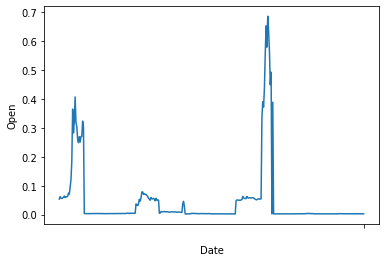

In [9]:
sns.lineplot(data=data,x=data['Date'],y=data['Open'])
plt.xticks(" ")

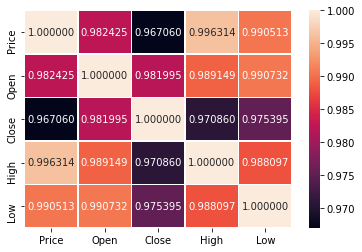

In [10]:
sns.heatmap(data.corr(),linewidths=.5,annot=True, fmt="f")

In [11]:
data=data.set_index(pd.DatetimeIndex(data['Date'].values))

In [12]:
data.head()

,Date,Price,Open,Close,High,Low,Vol.,Change %
2021-04-01,"Apr 01, 2021",0.062113,0.053742,0.054026,0.070722,0.053723,26.14B,15.57%
2021-04-02,"Apr 02, 2021",0.057570,0.062093,0.053742,0.062794,0.057285,8.10B,-7.31%
2021-04-03,"Apr 03, 2021",0.055554,0.057567,0.062093,0.059440,0.055553,4.08B,-3.50%
2021-04-04,"Apr 04, 2021",0.057401,0.055542,0.057567,0.058122,0.055121,3.28B,3.32%
2021-04-05,"Apr 05, 2021",0.059948,0.057393,0.055542,0.060593,0.056318,5.22B,4.44%


In [13]:
data=data[['Close']]

In [14]:
data.head()

,Close
2021-04-01,0.054026
2021-04-02,0.053742
2021-04-03,0.062093
2021-04-04,0.057567
2021-04-05,0.055542


In [15]:
prediction_days=1
data['Prediction']=data[['Close']].shift(-prediction_days)
data.head()

,Close,Prediction
2021-04-01,0.054026,0.053742
2021-04-02,0.053742,0.062093
2021-04-03,0.062093,0.057567
2021-04-04,0.057567,0.055542
2021-04-05,0.055542,0.057393


In [16]:
data['Prediction']=data['Prediction'].fillna(0)
data['Close']=data['Close'].fillna(0)

In [17]:
X=np.array(data.drop(['Prediction'],axis=1))
X

array([[0.054026],
       [0.053742],
       [0.062093],
       [0.057567],
       [0.055542],
       [0.057393],
       [0.059921],
       [0.064281],
       [0.05873 ],
       [0.061754],
       [0.061605],
       [0.06368 ],
       [0.074205],
       [0.070709],
       [0.09425 ],
       [0.121275],
       [0.182628],
       [0.365389],
       [0.282723],
       [0.322197],
       [0.407451],
       [0.317922],
       [0.305718],
       [0.2608  ],
       [0.24879 ],
       [0.269932],
       [0.251192],
       [0.270118],
       [0.270696],
       [0.323591],
       [0.003227],
       [0.003224],
       [0.003713],
       [0.003333],
       [0.003372],
       [0.003549],
       [0.003501],
       [0.003559],
       [0.003531],
       [0.003514],
       [0.003468],
       [0.003495],
       [0.003391],
       [0.003462],
       [0.003483],
       [0.00357 ],
       [0.003535],
       [0.003535],
       [0.003589],
       [0.003477],
       [0.003419],
       [0.003441],
       [0.00

In [18]:
X=X[:len(data)-prediction_days-1]

In [19]:
y=np.array(data['Prediction'])
y=y[:-prediction_days-1]

##Model RandomForestRegressor

In [20]:
np.random.seed(100100)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=600,random_state=700,max_depth=50)
forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=50, n_estimators=600, random_state=700)

In [22]:
#Checking the accuracy of the model
forest.score(x_test,y_test)

0.9403469167972336

## Validating Model

In [23]:
temp_data=data[:-prediction_days]

In [24]:
x_val=temp_data.tail(1)['Close'][0]
x_val

0.0026969999999999997

In [25]:
pred=forest.predict([[x_val]])
pred

array([0.00268927])

In [26]:
print("The Predicted value of Dogecoin is",pred)
print('The Actual value was',temp_data.tail(1)['Prediction'][0])

The Predicted value of Dogecoin is [0.00268927]
The Actual value was 0.002648


##Summary with  Adjusted R-Squared,R-Squared and RMSE value

In [27]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)

 26%|██▌       | 11/42 [00:00<00:01, 26.16it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 71%|███████▏  | 30/42 [00:01<00:00, 22.53it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(291, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.


100%|██████████| 42/42 [00:02<00:00, 18.25it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BaggingRegressor                             0.96       0.96  0.03        0.03
GradientBoostingRegressor                    0.95       0.95  0.03        0.11
RandomForestRegressor                        0.95       0.95  0.03        0.23
XGBRegressor                                 0.95       0.95  0.03        0.30
DecisionTreeRegressor                        0.95       0.95  0.03        0.02
ExtraTreesRegressor                          0.92       0.92  0.04        0.14
AdaBoostRegressor                            0.90       0.91  0.04        0.09
NuSVR                                        0.90       0.90  0.04        0.09
SGDRegressor                                 0.82       0.82  0.06        0.01
ElasticNetCV                                 0.82       0.82  0.06        0.06
LassoCV                                      0.82   

####We observe that DecisionTreeRegressor Model has a value of Adjusted R-Squared , R-Squared and RMSE as 0.95 , 0.95 and 0.03 respectively